# TOPOCUT

Extracts elevation data from a DEM and creates a shapefile of contours



In [28]:
import elevation
from osgeo import gdal
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## 1. Get the DEM data.

Define the file output for our DEM grab. This will be a .tif file, because that's what the `elevation` library generates. We need to be sure to save to the local directory, so it doesn't end up in our environment directory (default python working directory for conda)

In [73]:
dir = !pwd
filename = 'CateMesa-DEM.tif'
file = dir[0] + '/' + filename

Specify the bounding box of the region to acquire, using decimal degrees:

`(LowerLeftLongitude, LowerLeftLatitude, UpperRightLongitude, UpperRightLatitude)`

In [93]:
cate_mesa=(-119.4863, 34.4000, -119.4726, 34.409)
rome=(12.35, 41.8, 12.65, 42)

In [94]:
elevation.clip(bounds=cate_mesa, output=file, product='SRTM1')
elevation.clean()

Let's make sure that worked and the file is where we think it should be:

In [95]:
files = !ls
'CateMesa-DEM.tif' in files

True

# 2. Import the data

We've got the data in a .tif
Let's bring it in and do the things.

### Read in the file using gdal.

In [96]:
gdal_data = gdal.Open(filename)

gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

### Convert to a numpy array.

In [98]:
data_array = gdal_data.ReadAsArray().astype(np.float)

#replace missing values if necessary
if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan
    


### Visualize the DEM data as contours

We'll use Matplotlib for now.

In [183]:
def get_levels(data, n_levels=10):
    import numpy as np
    interval = get_interval(data, n_levels+1)
    levels = np.arange(data.min(), data.max(), interval)
    return levels[1:]

def get_interval(data, n_contours):
    max_elevation=data.max()
    min_elevation=data.min()
    diff = max_elevation - min_elevation
    if diff > 0:
        interval = diff/n_contours
    else:
        interval = None
    return interval

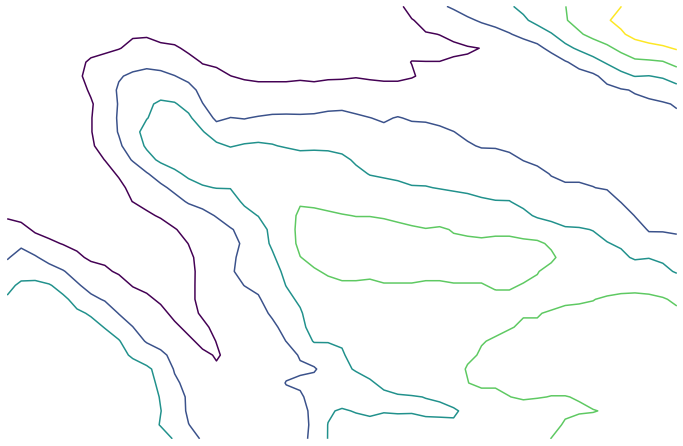

In [184]:
n_levels = 5
levels = get_levels(data_array, n_levels)

fig = plt.figure(figsize = (12, 8))
plt.axis('off')
cs = plt.contour(data_array, cmap = "viridis", levels=levels)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## Now we need to export the countours as vector graphics

Process:

1. Iterate through each contour.
2. Make an otherwise blank figure that only has that contour.
3. Use filled contours, so that we are able to clip the path to the edges of the data boundaries.


In [186]:
for level in levels:
    fig=plt.figure(figsize = (12, 8))
    plt.axis('off')
    plt.contourf(data_array, cmap = "viridis", levels=[level, data_array.max()])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.savefig("{file}_{elev}.svg".format(file=file.split('.')[0], elev=int(level)))
    plt.close(fig)

AttributeError: module 'matplotlib.pyplot' has no attribute 'artist'

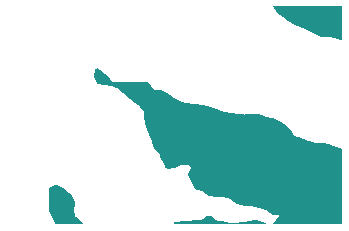

In [179]:
level = 123
cs = plt.contourf(data_array, cmap = "viridis", levels=[level, data_array.max()])
plt.axis('off')
plt.show()


